# DATA ANALYSIS part 1: Toss/Winners/Winning Margins
In this section,the focus of the analysis were the 
 - toss before the start of every match
 - winning teams
 - winning margins (by runs/ by wickets)

In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide Code."></form>''')

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
match_info = pd.read_csv('C:\\Users\\DELL\\Cricdata\\match_summary.csv')

In [23]:
match_info.head(10)

,match_id,Team1,Team2,Season,Date,Venue,Toss_Winner,Toss_Decision,Winner,Winning_Margin,ByWickets,ByRuns
0,1229326,Sunrisers,Southern Vipers,2020,29-08-2020,Chelmsford,Southern Vipers,field,Southern Vipers,7,Y,N
1,1229327,Central Sparks,Northern Diamonds,2020,29-08-2020,Birmingham,Central Sparks,bat,Northern Diamonds,9,Y,N
2,1229328,Thunder,Lightning,2020,29-08-2020,Nottingham,Thunder,bat,Thunder,4,N,Y
3,1229329,South East Stars,Western Storm,2020,29-08-2020,Beckenham,Western Storm,field,Western Storm,6,Y,N
4,1229330,Southern Vipers,Western Storm,2020,31-08-2020,Bristol,Western Storm,field,Southern Vipers,22,N,Y
5,1229331,South East Stars,Sunrisers,2020,31-08-2020,Beckenham,South East Stars,bat,South East Stars,77,N,Y
6,1229332,Thunder,Central Sparks,2020,31-08-2020,Birmingham,Thunder,bat,Central Sparks,4,Y,N
7,1229333,Northern Diamonds,Lightning,2020,31-08-2020,Chester-le-Street,Northern Diamonds,bat,Northern Diamonds,9,N,Y
8,1229334,Thunder,Central Sparks,2020,05-09-2020,Worcester,Thunder,bat,Central Sparks,8,Y,N
9,1229335,Western Storm,Sunrisers,2020,05-09-2020,Chelmsford,Sunrisers,field,Western Storm,86,N,Y


In [24]:
match_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        55 non-null     int64 
 1   Team1           55 non-null     object
 2   Team2           55 non-null     object
 3   Season          55 non-null     int64 
 4   Date            55 non-null     object
 5   Venue           55 non-null     object
 6   Toss_Winner     55 non-null     object
 7   Toss_Decision   55 non-null     object
 8   Winner          55 non-null     object
 9   Winning_Margin  55 non-null     int64 
 10  ByWickets       55 non-null     object
 11  ByRuns          55 non-null     object
dtypes: int64(3), object(9)
memory usage: 5.3+ KB


## <center> 1. Toss <center>

The coin toss takes place before starting of every match between the captains of the two playing teams. The captain that wins the toss gets to decide whether to bat or field(bowl) first.

In [25]:
match_info['Toss_Decision'].value_counts()

bat      30
field    25
Name: Toss_Decision, dtype: int64

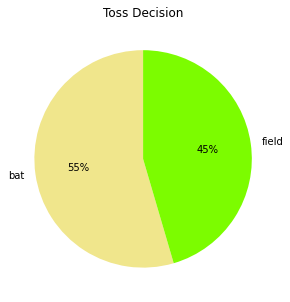

In [26]:
#plot percentages of Toss Decision
plt.figure(figsize=(5, 5)) #figure size
plt.title('Toss Decision') #plot title
match_info['Toss_Decision'].value_counts().plot.pie(autopct="%.0f%%",startangle=90,
                                                    colors=['khaki','lawngreen']) #pie chart showing percentages
plt.ylabel('') #no y axis labels

plt.savefig('C:\\Users\\DELL\\Cricdata\TossDecision_prcnt.jpeg') #save the figure
plt.show() #show it now below

55% of the time captains chose to bat first and the rest 45% chose to field first 

In [27]:
#create another dataframe taking columns from match_info
tossmatch_win = match_info[['Toss_Decision','Toss_Winner','Winner']]
tossmatch_win.head()

,Toss_Decision,Toss_Winner,Winner
0,field,Southern Vipers,Southern Vipers
1,bat,Central Sparks,Northern Diamonds
2,bat,Thunder,Thunder
3,field,Western Storm,Western Storm
4,field,Western Storm,Southern Vipers


In [28]:
#Add a new column
tossmatch_win['OnlyToss_Winner']=np.nan

In [29]:
for i in range(len(tossmatch_win)):
    if tossmatch_win['Winner'][i] == tossmatch_win['Toss_Winner'][i]:
        tossmatch_win['OnlyToss_Winner'][i] = "No"
    else:
        tossmatch_win['OnlyToss_Winner'][i] = "Yes"

In [30]:
tossmatch_win.head(10)

,Toss_Decision,Toss_Winner,Winner,OnlyToss_Winner
0,field,Southern Vipers,Southern Vipers,No
1,bat,Central Sparks,Northern Diamonds,Yes
2,bat,Thunder,Thunder,No
3,field,Western Storm,Western Storm,No
4,field,Western Storm,Southern Vipers,Yes
5,bat,South East Stars,South East Stars,No
6,bat,Thunder,Central Sparks,Yes
7,bat,Northern Diamonds,Northern Diamonds,No
8,bat,Thunder,Central Sparks,Yes
9,field,Sunrisers,Western Storm,Yes


In [31]:
tossmatch_win['OnlyToss_Winner'].value_counts()

Yes    30
No     25
Name: OnlyToss_Winner, dtype: int64

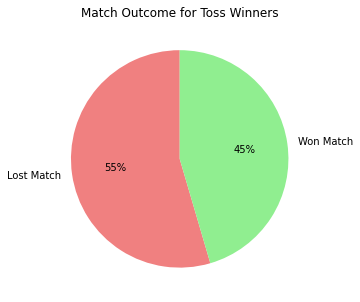

In [32]:
#plot percentages of Toss Winner Outcome
plt.figure(figsize=(5, 5)) 
plt.title('Match Outcome for Toss Winners') 
outcome=["Lost Match", "Won Match"]
tossmatch_win['OnlyToss_Winner'].value_counts().plot.pie(labels=outcome,autopct="%.0f%%",
                                                         startangle=90, colors=['lightcoral','lightgreen']) 
plt.ylabel('')

plt.savefig('C:\\Users\\DELL\\Cricdata\TossWinnerOutcome.jpeg')
plt.show()

45% teams won the toss as well as the match while 55% toss winning teams lost the match.

In [33]:
winner_tosschoice=tossmatch_win[tossmatch_win['OnlyToss_Winner']=="No"]['Toss_Decision'].value_counts()
winner_tosschoice

bat      14
field    11
Name: Toss_Decision, dtype: int64

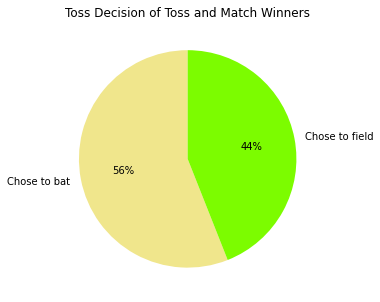

In [34]:
#plot percentages of Toss Choice of Winners
plt.figure(figsize=(7, 5)) 
plt.title('Toss Decision of Toss and Match Winners') 
outcome=["Chose to bat", "Chose to field"]
winner_tosschoice.plot.pie(labels=outcome,autopct="%.0f%%",startangle=90, colors=['khaki','lawngreen']) 
plt.ylabel('')

plt.savefig('C:\\Users\\DELL\\Cricdata\WinnerTossChoice.jpeg')
plt.show()

Of the teams that won both the toss and match majority (56%) chose to bat first and the remaining (44%) won the match after fielding in the first innings

In [35]:
winner_batfirst=tossmatch_win[tossmatch_win['Toss_Decision']=="bat"]['OnlyToss_Winner'].value_counts()
winner_batfirst

Yes    16
No     14
Name: OnlyToss_Winner, dtype: int64

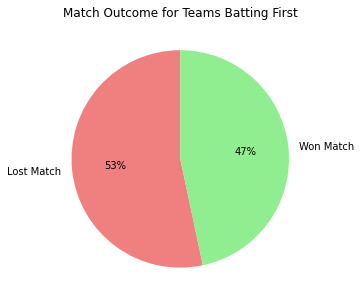

In [36]:
#plot outcome of teams batting first
plt.figure(figsize=(5, 5)) 
plt.title('Match Outcome for Teams Batting First') 
outcome=["Lost Match", "Won Match"]
winner_batfirst.plot.pie(labels=outcome,autopct="%.0f%%",
                                                         startangle=90, colors=['lightcoral','lightgreen']) 
plt.ylabel('')

plt.savefig('C:\\Users\\DELL\\Cricdata\BatFirstOutcome.jpeg')
plt.show()

Teams choosing to bat first won the match 47% of the time

In [37]:
winner_fieldfirst=tossmatch_win[tossmatch_win['Toss_Decision']=="field"]['OnlyToss_Winner'].value_counts()
winner_fieldfirst

Yes    14
No     11
Name: OnlyToss_Winner, dtype: int64

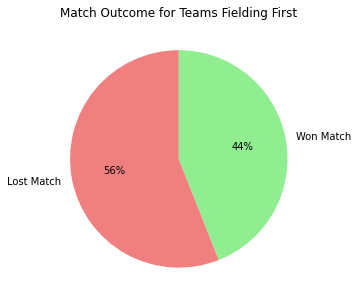

In [38]:
#plot outcome of teams fielding first
plt.figure(figsize=(5, 5)) 
plt.title('Match Outcome for Teams Fielding First') 
outcome=["Lost Match", "Won Match"]
winner_fieldfirst.plot.pie(labels=outcome,autopct="%.0f%%",
                                                         startangle=90, colors=['lightcoral','lightgreen']) 
plt.ylabel('')

plt.savefig('C:\\Users\\DELL\\Cricdata\FieldFirstOutcome.jpeg')
plt.show()

Teams that chose to field(bowl) first won 44% of the time 

In [39]:
tossmatch_win.head()

,Toss_Decision,Toss_Winner,Winner,OnlyToss_Winner
0,field,Southern Vipers,Southern Vipers,No
1,bat,Central Sparks,Northern Diamonds,Yes
2,bat,Thunder,Thunder,No
3,field,Western Storm,Western Storm,No
4,field,Western Storm,Southern Vipers,Yes


In [40]:
tossmatch_win['winner_firstinns']=np.nan

for i in range(len(tossmatch_win)):
    if tossmatch_win['OnlyToss_Winner'][i] == "No":
        tossmatch_win['winner_firstinns'][i] = tossmatch_win['Toss_Decision'][i] + " first"
    else:
        if  tossmatch_win['Toss_Decision'][i]=="bat":
            tossmatch_win['winner_firstinns'][i]="field first"
        else:
            tossmatch_win['winner_firstinns'][i]="bat first"

In [41]:
tossmatch_win.head()

,Toss_Decision,Toss_Winner,Winner,OnlyToss_Winner,winner_firstinns
0,field,Southern Vipers,Southern Vipers,No,field first
1,bat,Central Sparks,Northern Diamonds,Yes,field first
2,bat,Thunder,Thunder,No,bat first
3,field,Western Storm,Western Storm,No,field first
4,field,Western Storm,Southern Vipers,Yes,bat first


In [42]:
tossmatch_win['winner_firstinns'].value_counts()

bat first      28
field first    27
Name: winner_firstinns, dtype: int64

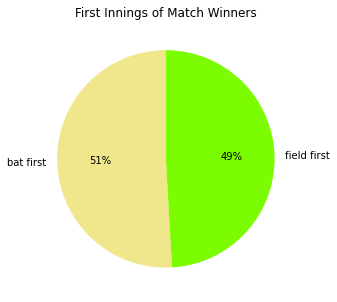

In [43]:
#plot percentages of Toss Choice of Winners
plt.figure(figsize=(5, 5)) 
plt.title('First Innings of Match Winners') 
#outcome=["bat first", "field first"]labels=outcome,
tossmatch_win['winner_firstinns'].value_counts().plot.pie(autopct="%.0f%%",startangle=90, colors=['khaki','lawngreen']) 
plt.ylabel('')

plt.savefig('C:\\Users\\DELL\\Cricdata\Winnerfirstinns.jpeg')
plt.show()

Irrespective of winning or losing the toss, 51% of the matches were won by teams batting first and 49% were won by teams fielding first 

## <center> 2. Winning Teams <center>

In [44]:
match_info['Winner'].value_counts()

Southern Vipers      14
Northern Diamonds    11
Central Sparks        8
Western Storm         7
Thunder               5
South East Stars      5
Lightning             5
Name: Winner, dtype: int64

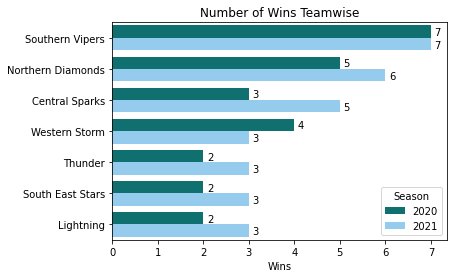

In [45]:
#plot number of wins by team
plt.figure(figsize=(6, 4))
plt.title('Number of Wins Teamwise') 
ax=sns.countplot(y='Winner', data=match_info, hue='Season', palette=['teal','lightskyblue'],
                 order=match_info['Winner'].value_counts().index)

# set the bar labels
for p in ax.patches:
    ax.annotate( int(p.get_width()),( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(10,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )     
    
plt.ylabel('')
plt.xlabel('Wins')

plt.savefig('C:\\Users\\DELL\\Cricdata\Winsteamwise.jpeg',bbox_inches='tight')
plt.show()

Among the eight teams, both times champions Southern Vipers have been the most successful team throughout the 2020 and 2021 seasons. They won all their matches in the 2020 season and won all except one match in 2021. The team has 14 wins out of 15 matches with 7 wins in each season. The other teams except Western Storm won more matches in 2021 than in 2020 season. Twice runners-up Northern Diamonds won 11 of 15 matches. Each of the teams North West Thunder, South East Stars and Lightning won 5 matches in total of which 2 were in 2020 and 3 were in 2021.  The Sunrisers were the least successful team, having lost every match. 

In [46]:
match_info['Venue'].unique()

array(['Chelmsford', 'Birmingham', 'Nottingham', 'Beckenham', 'Bristol',
       'Chester-le-Street', 'Worcester', 'Leicester', 'Brighton',
       'Liverpool', 'Southampton', 'Leeds', 'London', 'Kibworth',
       'Chester', 'Cambridge', 'Loughborough', 'Taunton', 'Northwood',
       'Sale', 'Scarborough', 'Northampton'], dtype=object)

In [47]:
match_info['Team1'].unique()

array(['Sunrisers', 'Central Sparks', 'Thunder', 'South East Stars',
       'Southern Vipers', 'Northern Diamonds', 'Western Storm',
       'Lightning'], dtype=object)

In [48]:
#create another dataframe taking columns from match_info
homeground_win = match_info[['Venue','Winner']]
homeground_win.head()

,Venue,Winner
0,Chelmsford,Southern Vipers
1,Birmingham,Northern Diamonds
2,Nottingham,Thunder
3,Beckenham,Western Storm
4,Bristol,Southern Vipers


In [49]:
#Add a new column
homeground_win['HomeGround_Winner']=np.nan

In [50]:
#Assign homeground values as Yes or No; homeground information taken from Wikipedia
for i in range(len(homeground_win)): 
    if homeground_win['Winner'][i]=='Sunrisers' and (homeground_win['Venue'][i]=='Chelmsford' or 
                                                     homeground_win['Venue'][i]=='Northampton' or
                                                     homeground_win['Venue'][i]=='Cambridge' or
                                                     homeground_win['Venue'][i]=='Northwood'):
        homeground_win['HomeGround_Winner'][i] = "Yes"
    elif homeground_win['Winner'][i]=='South East Stars' and (homeground_win['Venue'][i]=='Beckenham' or
                                                              homeground_win['Venue'][i]=='London'):
        homeground_win['HomeGround_Winner'][i] = "Yes"
    elif homeground_win['Winner'][i]=='Southern Vipers' and (homeground_win['Venue'][i]=='Southampton' or 
                                                             homeground_win['Venue'][i]=='Brighton'):
        homeground_win['HomeGround_Winner'][i] = "Yes"
    elif homeground_win['Winner'][i]=='Thunder' and (homeground_win['Venue'][i]=='Sale' or 
                                                     homeground_win['Venue'][i]=='Liverpool' or
                                                     homeground_win['Venue'][i]=='Chester'):
        homeground_win['HomeGround_Winner'][i] = "Yes"
    elif homeground_win['Winner'][i]=='Northern Diamonds' and (homeground_win['Venue'][i]=='Chester-le-Street' or 
                                                               homeground_win['Venue'][i]=='Leeds' or
                                                               homeground_win['Venue'][i]=='Scarborough'):
        homeground_win['HomeGround_Winner'][i] = "Yes"
    elif homeground_win['Winner'][i]=='Western Storm' and (homeground_win['Venue'][i]=='Bristol' or 
                                                           homeground_win['Venue'][i]=='Taunton'):
        homeground_win['HomeGround_Winner'][i] = "Yes"
    elif homeground_win['Winner'][i]=='Lightning' and (homeground_win['Venue'][i]=='Leicester' or 
                                                       homeground_win['Venue'][i]=='Loughborough' or
                                                       homeground_win['Venue'][i]=='Nottingham' or 
                                                       homeground_win['Venue'][i]=='Kibworth'):
        homeground_win['HomeGround_Winner'][i] = "Yes"
    elif homeground_win['Winner'][i]=='Central Sparks' and (homeground_win['Venue'][i]=='Worcester' or 
                                                            homeground_win['Venue'][i]=='Birmingham'):
        homeground_win['HomeGround_Winner'][i] = "Yes"
    else:
        homeground_win['HomeGround_Winner'][i] = "No" 

In [51]:
homeground_win.head(10)

,Venue,Winner,HomeGround_Winner
0,Chelmsford,Southern Vipers,No
1,Birmingham,Northern Diamonds,No
2,Nottingham,Thunder,No
3,Beckenham,Western Storm,No
4,Bristol,Southern Vipers,No
5,Beckenham,South East Stars,Yes
6,Birmingham,Central Sparks,Yes
7,Chester-le-Street,Northern Diamonds,Yes
8,Worcester,Central Sparks,Yes
9,Chelmsford,Western Storm,No


In [52]:
homeground_win['HomeGround_Winner'].value_counts()

Yes    28
No     27
Name: HomeGround_Winner, dtype: int64

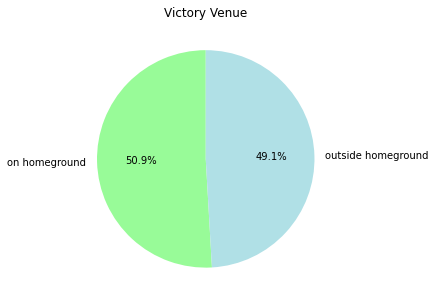

In [53]:
#plot percentages of Home Ground Winners
plt.figure(figsize=(7, 5)) 
plt.title('Victory Venue') 
outcome=["on homeground", "outside homeground"]
homeground_win['HomeGround_Winner'].value_counts().plot.pie(labels=outcome,autopct="%3.1f%%",
                                                         startangle=90, colors=['palegreen','powderblue']) 
plt.ylabel('')

plt.savefig('C:\\Users\\DELL\\Cricdata\HomeGroundWinners.jpeg')
plt.show()

51% of matches were won on homeground

## <center> 3. Winning Margins <center>

When a team wins by defending their first innings run total, then the winning margin is represented by runs and when a team wins by successfully chasing the run target of the opponent then the winning margin is given in by wickets. Winning ‘by runs’ attributed to the bowling team, denotes the number of runs by which the team batting second falls short off reaching the required target. Winning ‘by wickets’ attributed to the second batting team, denotes the number of remaining wickets or batters left to bat for the team when they successfully score the required target runs.  There have been victories of both great and narrow margins. 

In [55]:
match_info.head()

,match_id,Team1,Team2,Season,Date,Venue,Toss_Winner,Toss_Decision,Winner,Winning_Margin,ByWickets,ByRuns
0,1229326,Sunrisers,Southern Vipers,2020,29-08-2020,Chelmsford,Southern Vipers,field,Southern Vipers,7,Y,N
1,1229327,Central Sparks,Northern Diamonds,2020,29-08-2020,Birmingham,Central Sparks,bat,Northern Diamonds,9,Y,N
2,1229328,Thunder,Lightning,2020,29-08-2020,Nottingham,Thunder,bat,Thunder,4,N,Y
3,1229329,South East Stars,Western Storm,2020,29-08-2020,Beckenham,Western Storm,field,Western Storm,6,Y,N
4,1229330,Southern Vipers,Western Storm,2020,31-08-2020,Bristol,Western Storm,field,Southern Vipers,22,N,Y


In [56]:
#create another dataframe
runs_margin = match_info[match_info['ByRuns']=="Y"][['Team1','Team2','Date','Winner','Winning_Margin']]

In [57]:
#sort in descending order
runs_margin = runs_margin.sort_values('Winning_Margin', ascending = False)

In [58]:
runs_margin.reset_index(drop=True,inplace=True)

In [59]:
runs_margin.head(10)

,Team1,Team2,Date,Winner,Winning_Margin
0,South East Stars,Sunrisers,29-05-2021,South East Stars,135
1,Lightning,Thunder,06-06-2021,Lightning,134
2,Central Sparks,Southern Vipers,05-06-2021,Central Sparks,120
3,Central Sparks,South East Stars,12-09-2021,Central Sparks,115
4,Southern Vipers,South East Stars,05-09-2020,Southern Vipers,111
5,Northern Diamonds,Thunder,12-09-2021,Northern Diamonds,105
6,Western Storm,Sunrisers,05-09-2020,Western Storm,86
7,South East Stars,Sunrisers,31-08-2020,South East Stars,77
8,Northern Diamonds,Thunder,10-09-2020,Northern Diamonds,73
9,Thunder,Lightning,13-09-2020,Thunder,72


In [60]:
#add a new column
runs_margin['message'] = np.nan
for i in range(len(runs_margin)):
    if runs_margin['Winner'][i] == runs_margin['Team1'][i]:
        runs_margin['message'][i] = "beat "+str(runs_margin['Team2'][i])+" by "+str(runs_margin['Winning_Margin'][i])+" runs "+"("+runs_margin['Date'][i]+")"      
    else:
        runs_margin['message'][i] = "beat "+str(runs_margin['Team1'][i])+" by "+str(runs_margin['Winning_Margin'][i])+" runs "+"("+runs_margin['Date'][i]+")"

In [61]:
runs_margin.head(10)

,Team1,Team2,Date,Winner,Winning_Margin,message
0,South East Stars,Sunrisers,29-05-2021,South East Stars,135,beat Sunrisers by 135 runs (29-05-2021)
1,Lightning,Thunder,06-06-2021,Lightning,134,beat Thunder by 134 runs (06-06-2021)
2,Central Sparks,Southern Vipers,05-06-2021,Central Sparks,120,beat Southern Vipers by 120 runs (05-06-2021)
3,Central Sparks,South East Stars,12-09-2021,Central Sparks,115,beat South East Stars by 115 runs (12-09-2021)
4,Southern Vipers,South East Stars,05-09-2020,Southern Vipers,111,beat South East Stars by 111 runs (05-09-2020)
5,Northern Diamonds,Thunder,12-09-2021,Northern Diamonds,105,beat Thunder by 105 runs (12-09-2021)
6,Western Storm,Sunrisers,05-09-2020,Western Storm,86,beat Sunrisers by 86 runs (05-09-2020)
7,South East Stars,Sunrisers,31-08-2020,South East Stars,77,beat Sunrisers by 77 runs (31-08-2020)
8,Northern Diamonds,Thunder,10-09-2020,Northern Diamonds,73,beat Thunder by 73 runs (10-09-2020)
9,Thunder,Lightning,13-09-2020,Thunder,72,beat Lightning by 72 runs (13-09-2020)


<Figure size 36x144 with 0 Axes>

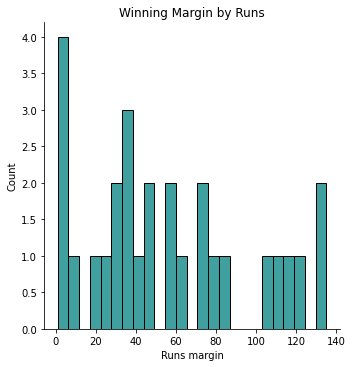

In [62]:
#plot distribution of  wins by runs
plt.figure(figsize=(0.5,2))
sns.displot(data=runs_margin,x='Winning_Margin',color="teal",bins=25)
plt.title('Winning Margin by Runs')
plt.xlabel('Runs margin')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Winbyruns_hist.jpeg',bbox_inches='tight')
plt.show()

Most matches have been won by 20 to 80 runs by the bowling team. There have been some close matches where the team managed to win by narrow run margins in the range of 1 to 10 runs. Some victories have also been achieved comfortably by high run margins of above 100 runs. 

In [63]:
runs_margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team1           28 non-null     object
 1   Team2           28 non-null     object
 2   Date            28 non-null     object
 3   Winner          28 non-null     object
 4   Winning_Margin  28 non-null     int64 
 5   message         28 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


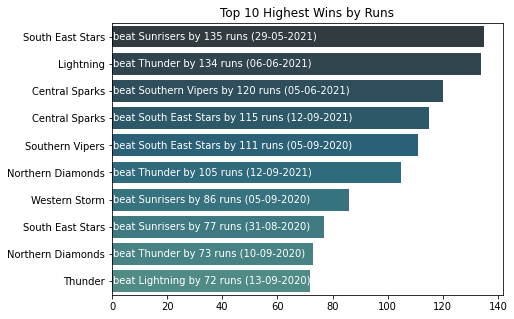

In [64]:
#plot top 10 highest winning margins by runs
df = runs_margin.head(10)

plt.figure(figsize=(7, 5))

plt.title('Top 10 Highest Wins by Runs')
ax = sns.barplot(x=df.Winning_Margin, y=df.index, orient='h',palette='crest_r_d')
ax.set_yticklabels(df.Winner)
plt.xlabel('')
 
# write messages on bars
for bar, msg in zip(ax.patches, df['message']):
    ax.text(0.5, bar.get_y()+bar.get_height()/2, msg, color='White', ha='left', va='center')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Top10WinsbyRuns.jpeg',bbox_inches='tight')
plt.show()

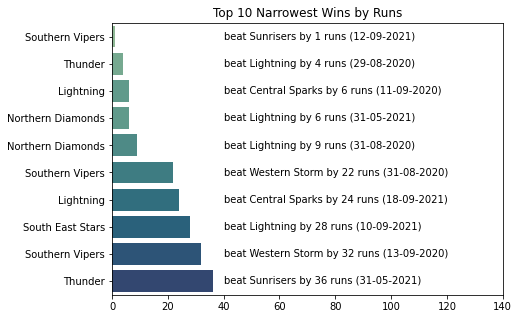

In [65]:
#plot top 10 narrowest winning margins by runs
df1 = runs_margin.tail(10)#sort_values('Winning_Margin', ascending=True)

plt.figure(figsize=(7, 5))

plt.title('Top 10 Narrowest Wins by Runs')
ax = sns.barplot(x=df1.Winning_Margin,y=df1.index,orient='h',palette='crest',hue=df1.Winning_Margin,dodge=False)
ax.set_yticklabels(df1.Winner)
ax.set_xlim(0,140) #set x axis limits
ax.legend_.remove() #hide the legend
plt.ylim(reversed(plt.ylim())) #invert the y-axis for ascending order
plt.xlabel('')
 
# write messages on bars
for bar, msg in zip(ax.patches, df1['message']):
    ax.text(40.0, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center',horizontalalignment='right')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Narrowest10WinsbyRuns.jpeg',bbox_inches='tight')
plt.show()

In [66]:
#Likewise do the same for wickets
wickets_margin = match_info[match_info['ByWickets']=="Y"][['Team1','Team2','Date','Winner','Winning_Margin']]
wickets_margin = wickets_margin.sort_values('Winning_Margin', ascending = False)
wickets_margin.reset_index(drop=True,inplace=True)
wickets_margin.head(10)

,Team1,Team2,Date,Winner,Winning_Margin
0,Sunrisers,Northern Diamonds,05-06-2021,Northern Diamonds,9
1,Central Sparks,Northern Diamonds,29-08-2020,Northern Diamonds,9
2,Thunder,Central Sparks,05-09-2020,Central Sparks,8
3,Western Storm,Southern Vipers,12-06-2021,Southern Vipers,8
4,Western Storm,Northern Diamonds,10-09-2021,Northern Diamonds,7
5,South East Stars,Southern Vipers,31-05-2021,Southern Vipers,7
6,Sunrisers,Southern Vipers,29-08-2020,Southern Vipers,7
7,South East Stars,Western Storm,11-09-2020,Western Storm,7
8,Sunrisers,South East Stars,13-09-2020,South East Stars,6
9,Sunrisers,Central Sparks,10-09-2021,Central Sparks,6


In [67]:
wickets_margin['Winning_Margin'].value_counts()

6    7
7    4
4    3
3    3
2    3
9    2
8    2
5    2
1    1
Name: Winning_Margin, dtype: int64

In [68]:
wickets_margin.tail(10)

,Team1,Team2,Date,Winner,Winning_Margin
17,Lightning,Southern Vipers,29-05-2021,Southern Vipers,4
18,South East Stars,Southern Vipers,19-09-2020,Southern Vipers,4
19,Thunder,Central Sparks,31-08-2020,Central Sparks,4
20,South East Stars,Northern Diamonds,12-06-2021,Northern Diamonds,3
21,Thunder,Southern Vipers,10-09-2021,Southern Vipers,3
22,Northern Diamonds,Southern Vipers,25-09-2021,Southern Vipers,3
23,Central Sparks,Thunder,12-06-2021,Thunder,2
24,Northern Diamonds,Central Sparks,29-05-2021,Central Sparks,2
25,Lightning,Northern Diamonds,05-09-2020,Northern Diamonds,2
26,Thunder,Western Storm,29-05-2021,Western Storm,1


In [69]:
#add a new column
wickets_margin['message'] = np.nan
for i in range(len(wickets_margin)):
    if wickets_margin['Winner'][i] == wickets_margin['Team1'][i]:
        wickets_margin['message'][i] = "beat "+str(wickets_margin['Team2'][i])+" by "+str(wickets_margin['Winning_Margin'][i])+" wickets "+"("+wickets_margin['Date'][i]+")"      
    else:
        wickets_margin['message'][i] = "beat "+str(wickets_margin['Team1'][i])+" by "+str(wickets_margin['Winning_Margin'][i])+" wickets "+"("+wickets_margin['Date'][i]+")"

In [70]:
wickets_margin.head(10)

,Team1,Team2,Date,Winner,Winning_Margin,message
0,Sunrisers,Northern Diamonds,05-06-2021,Northern Diamonds,9,beat Sunrisers by 9 wickets (05-06-2021)
1,Central Sparks,Northern Diamonds,29-08-2020,Northern Diamonds,9,beat Central Sparks by 9 wickets (29-08-2020)
2,Thunder,Central Sparks,05-09-2020,Central Sparks,8,beat Thunder by 8 wickets (05-09-2020)
3,Western Storm,Southern Vipers,12-06-2021,Southern Vipers,8,beat Western Storm by 8 wickets (12-06-2021)
4,Western Storm,Northern Diamonds,10-09-2021,Northern Diamonds,7,beat Western Storm by 7 wickets (10-09-2021)
5,South East Stars,Southern Vipers,31-05-2021,Southern Vipers,7,beat South East Stars by 7 wickets (31-05-2021)
6,Sunrisers,Southern Vipers,29-08-2020,Southern Vipers,7,beat Sunrisers by 7 wickets (29-08-2020)
7,South East Stars,Western Storm,11-09-2020,Western Storm,7,beat South East Stars by 7 wickets (11-09-2020)
8,Sunrisers,South East Stars,13-09-2020,South East Stars,6,beat Sunrisers by 6 wickets (13-09-2020)
9,Sunrisers,Central Sparks,10-09-2021,Central Sparks,6,beat Sunrisers by 6 wickets (10-09-2021)


<Figure size 36x144 with 0 Axes>

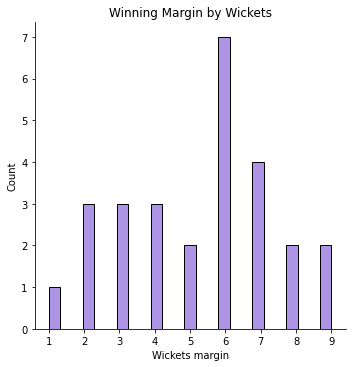

In [71]:
#plot distribution of  wins by wickets
plt.figure(figsize=(0.5,2))
sns.displot(data=wickets_margin,x='Winning_Margin',color="mediumpurple",bins=25)
plt.title('Winning Margin by Wickets')
plt.xlabel('Wickets margin')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Winbywickets_hist.jpeg',bbox_inches='tight')
plt.show()

For teams batting second, most wins came by 2 to 7 wickets. Seven matches have been won by 6 wickets remaining. One match witnessed a close victory by 1 wicket while a few matches were comfortable victories for the chasing team with 8 and 9 wickets in hand

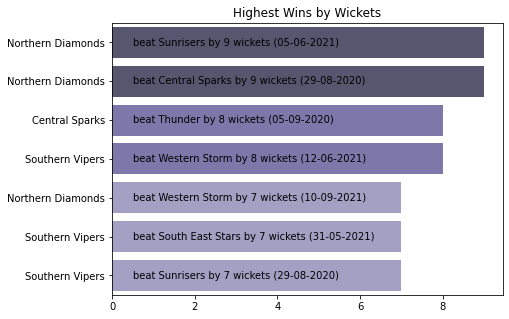

In [72]:
#plot highest winning margins by wickets
df = wickets_margin.head(7)

plt.figure(figsize=(7, 5))

plt.title('Highest Wins by Wickets')
ax = sns.barplot(x=df.Winning_Margin, y=df.index, orient='h',palette='Purples_d',hue=df.Winning_Margin,dodge=False)
ax.set_yticklabels(df.Winner)
ax.legend_.remove() #hide the legend
plt.xlabel('')
 
# write messages on bars
for bar, msg in zip(ax.patches, df['message']):
    ax.text(0.5, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')

plt.savefig('C:\\Users\\DELL\\Cricdata\\TopWinsbyWickets.jpeg',bbox_inches='tight')
plt.show()

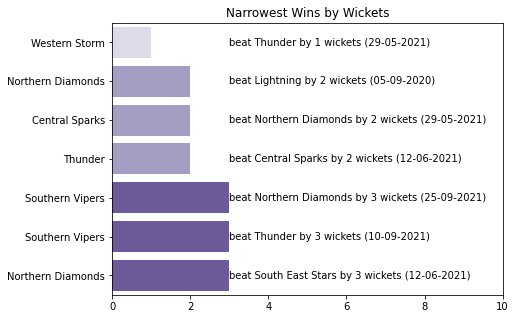

In [73]:
#plot narrowest winning margins by wickets
df1 = wickets_margin.tail(7)

plt.figure(figsize=(7, 5))

plt.title('Narrowest Wins by Wickets')
ax = sns.barplot(x=df1.Winning_Margin, y=df1.index, orient='h',palette='Purples',hue=df1.Winning_Margin,dodge=False)
ax.set_yticklabels(df1.Winner)
ax.set_xlim(0,10) #set x axis limits
ax.legend_.remove() #hide the legend
plt.ylim(reversed(plt.ylim())) #invert the y-axis for ascending order
plt.xlabel('')
 
# write messages on bars
for bar, msg in zip(ax.patches, df1['message']):
    ax.text(3.0, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')

plt.savefig('C:\\Users\\DELL\\Cricdata\\NarrowWinsbyWickets.jpeg',bbox_inches='tight')
plt.show()